# Lab 1 - Vectors and Matrices
This notebook demonstrate the use of vectors and matrices in Ipython. Note that the basis is not explicit in any of these operations. You must keep track of the basis yourself (using variable names, or notes etc).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rv = array([1,2])  # a row vector
rv

array([1, 2])

In [3]:
cv = array([[3],[4]])  # a column vector
cv

array([[3],
       [4]])

Two kinds of vector products we'll see: inner product (dot product) and outer product

### 1) Use the function _dot(vector1, vector2)_ to find the dot product of rv and cv. Does the order of the arguments matter?

In [4]:
dot(rv,cv)

array([11])

In [5]:
dot(cv,rv)

ValueError: shapes (2,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

### 2) Use the function _outer(vector1, vector2)_ to find the outer product of rv and cv. Does the order of the arguments matter?

In [6]:
outer(rv,cv)

array([[3, 4],
       [6, 8]])

In [7]:
outer(cv,rv)

array([[3, 6],
       [4, 8]])

## II. Complex vectors

In [8]:
# Complex numbers in python have a j term:
a = 1+2j

In [9]:
v1 = array([1+2j, 3+2j, 5+1j, 4+0j])

The complex conjugate changes the sign of the imaginary part:

In [10]:
v1.conjugate()

array([ 1.-2.j,  3.-2.j,  5.-1.j,  4.-0.j])

### 3) Use _dot()_ and _.conjugate()_ to find the dot product of v1 and it's own conjugate:

In [11]:
dot(v1.conjugate(),v1)

(60+0j)

## III. Matrices

In [12]:
# a two-dimensional array
m1 = array([[2,1],[2,1]])
m1

array([[2, 1],
       [2, 1]])

In [13]:
# can find transpose with the T method:
m1.T

array([[2, 2],
       [1, 1]])

In [14]:
# find the eigenvalues and eigenvectors of a matrix:
eig(m1)

(array([ 3.,  0.]), array([[ 0.70710678, -0.4472136 ],
        [ 0.70710678,  0.89442719]]))

In [15]:
# use a question mark to get help on a command
eig?

# Examples:
## Example 1.4
Find the eigenvalues and eigenvectors of M = ([0,1],[-2,3]])

In [16]:
M14 = array([[0,1],[-2,3]])

In [17]:
eig(M14)

(array([ 1.,  2.]), array([[-0.70710678, -0.4472136 ],
        [-0.70710678, -0.89442719]]))

Interpret this result:
the two eigenvalues are 1 and 2
the eigenvectors are strange decimals, but we can check them against the stated solution:

In [18]:
1/sqrt(2)  # this is the value for both entries in the first eigenvector

0.70710678118654746

In [19]:
1/sqrt(5)  # this is the first value in the second eigenvector

0.44721359549995793

In [20]:
2/sqrt(5)  # this is the second value in the second eigenvector

0.89442719099991586

In [21]:
eigvals(M14)

array([ 1.,  2.])

Signs are opposite compared to the book, but it turns out that (-) doesn't matter in the interpretation of eigenvectors: only "direction" matters (the relative size of the entries).

## 4) Answer problem 1.16 using Ipython functions

In [22]:
M16 = array([[0,-1j],[1j,0]])

In [23]:
evals, evecs = eig(M16)

In [24]:
evecs

array([[-0.00000000-0.70710678j,  0.70710678+0.j        ],
       [ 0.70710678+0.j        ,  0.00000000-0.70710678j]])

In [25]:
evecs[:,0]

array([-0.00000000-0.70710678j,  0.70710678+0.j        ])

In [26]:
evecs[:,1]

array([ 0.70710678+0.j        ,  0.00000000-0.70710678j])

In [27]:
dot(evecs[:,0].conjugate(),evecs[:,1])

-1.6653345369377348e-16j

# Part 2: Using QuTiP
Keeping track of row and column vectors in Ipython is somewhat artificial and tedious. The QuTiP library is designed to take care of many of these headaches

In [28]:
from qutip import *

In [30]:
# Create a row vector:
qv = Qobj([[1,2]])
qv

Quantum object: dims = [[1], [2]], shape = [1, 2], type = bra
Qobj data =
[[ 1.  2.]]

In [31]:
# Find the corresponding column vector
qv.dag()

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 2.]]

In [37]:
qv2 = Qobj([[1+2j,4-1j]])
qv2

Quantum object: dims = [[1], [2]], shape = [1, 2], type = bra
Qobj data =
[[ 1.+2.j  4.-1.j]]

In [38]:
qv2.dag()

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.-2.j]
 [ 4.+1.j]]

### Vector products in QuTiP
Only need to know one operator: "\*"
The product will depend on the order, either inner or outer

In [39]:
qv2*qv2.dag()  # inner product (dot product)

Quantum object: dims = [[1], [1]], shape = [1, 1], type = oper, isherm = True
Qobj data =
[[ 22.]]

In [40]:
qv2.dag()*qv2  # outer product

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[  5.+0.j   2.-9.j]
 [  2.+9.j  17.+0.j]]

## Matrix in QuTiP

In [41]:
qm = Qobj([[1,2],[2,1]])
qm

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  2.]
 [ 2.  1.]]

In [42]:
qm.eigenenergies()  # in quantum (as we will learn) eigenvalues often correspond to energy levels

array([-1.,  3.])

In [43]:
evals, evecs = qm.eigenstates()

In [44]:
evecs

array([ Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[-0.70710678]
 [ 0.70710678]],
       Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.70710678]
 [ 0.70710678]]], dtype=object)

In [45]:
evecs[0]

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[-0.70710678]
 [ 0.70710678]]

# Practice:

## Problem 1.2 using the _hist()_ function.

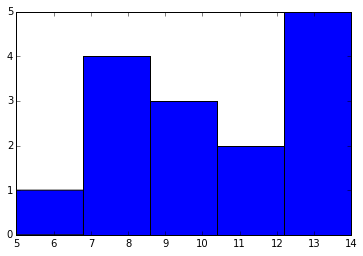

In [46]:
n, bins, patches = hist([10,13,14,14,6,8,7,9,12,14,13,11,10,7,7],bins=5,range=(5,14))

In [47]:
n

array([ 1.,  4.,  3.,  2.,  5.])

In [48]:
pvals = n/n.sum()

## Problem 1.8
**Hint:** using sympy, we can calculate the relevant integral. The conds='none' asks the solver to ignore any strange conditions on the variables in the integral. This is fine for most of our integrals. Usually the variables are real and well-behaved numbers.

In [49]:
from sympy import *

In [50]:
c,a,x = symbols("c a x")

In [51]:
Q.positive((c,a))

Q.positive((c, a))

In [52]:
integrate(c*exp(-a*x),(x,0,oo),conds='none')

c/a

In [53]:
integrate(a*exp(-a*x),(x,0,oo),conds='none')

1